## 1. Set Up Your Environment
It is recommended to use a cloud platform as Google Colab if you are not familiar with Python and virtual environments. This will allow you to run the code without any setup. If you are using a local environment, you can use Jupyter Notebook or any other Python IDE to run the code.

Make sure you have Python and the necessary libraries installed. You can install the required libraries using pip:

In [ ]:
# It is possible that in your system you need to replace % with !
%pip install numpy pandas matplotlib tensorflow

In [ ]:
# Import the libraries, this part is essential to run the code
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of the data
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


## 2. Import Libraries and Load Data
Start by importing the necessary libraries and loading the MNIST dataset.

In [ ]:
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to fit the model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


## 4. Build the CNN Model
Define the structure of your Convolutional Neural Network (CNN) model. You can experiment with different architectures, layers, and hyperparameters.

In [ ]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## 5. Train the Model
Train the CNN on the training data. You can experiment with different batch sizes, epochs, and learning rates.

In [ ]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)


## 6. Evaluate the Model
Evaluate the model on the test data. You can calculate the accuracy and other metrics to assess the performance of the model.

In [ ]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")


## 7. Make Predictions
Use the trained model to make predictions on new data. You can visualize the predictions and compare them with the actual labels.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


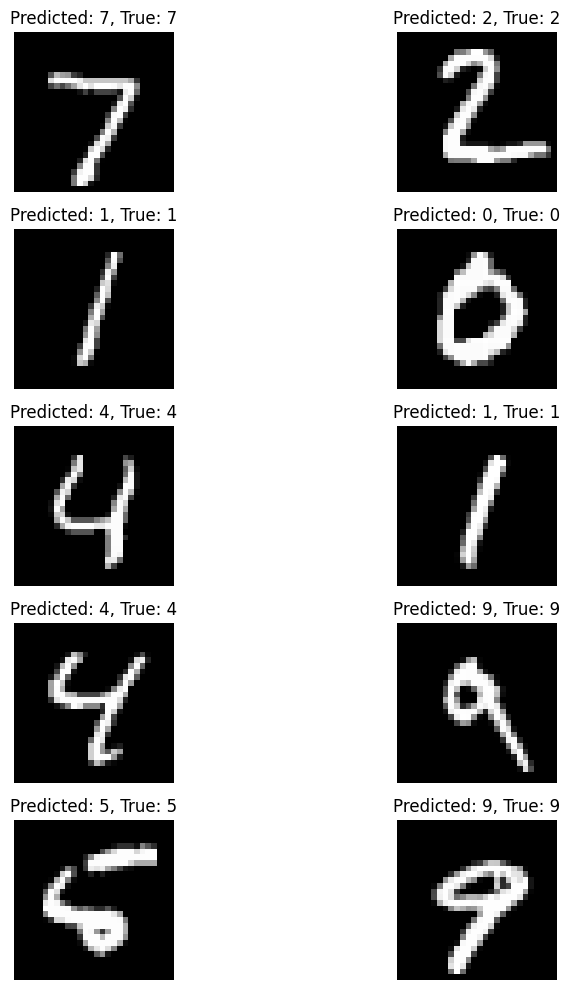

In [8]:
# Predict the first 10 test images
predictions = model.predict(x_test[:10])

# Plot the first 10 test images, their predicted labels, and the true labels
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()
# If code is unalterated, the output should be the first 10 images of the dataset with the predicted and true labels, and as the accuracy of the model should be around 99%,
# the predicted labels should be the same as the true labels.